In [1]:
messages = [
    "All right. So I'm going to present a presentation called PIP-Net with Count-Aware Representations. And first, I will just briefly introduce the motivation behind this architecture. So we know that humans classify images.",
    "Okay, so when humans classify images, they can explain their predictions in terms of a certain characteristical part of the image. And that's why we can kind of interpret classification behavior of humans. And the question is basically, can neural networks do the same",
    "So the authors of PIPnet architecture claim that yes, they can, and they propose this solution called PIPnet itself. So the idea is that neural networks already use some kind of features that they extract from images.",
    "But the problem is that the features that neural networks use are not interpretable. So the goal of PIPNet is to do a certain retraining stage with two loss objectives that make these features correspond to semantically meaningful components.",
    "So, they do it by imposing two loss objectives. The first is called alignment loss, and it basically incentivizes the model to map visually similar features to similar prototypes, to similar image processes.",
    "So, in this way, these prototypes become insensitive to random perturbations of the image patches. So when a human can tell that these patches look the same, the neural network should be able to tell, too. And the second objective is called tangent loss.",
    "And that kind of loss ensures that our prototypes are diverse, because notice that you can minimize the alignment loss just by assigning one of the prototypes to be active at every image patch, and to set all the other prototypes to zero.",
    "So, tangent loss basically prevents such a situation from happening. And when you finish this pre-training stage with these two objectives, you attach a regular classification set, which just has some modifications permitted.",
    "So yeah, this classification layer basically has some built-in mechanism to make it faster and hence more interpretable. So the main point here is that if prototype is present at the image multiple times, the max pooling layer is going to read it.",
    "The max pooling layer is going to treat it as a single activation. We can think that it prevents the model from distinguishing different counts of objects. Our goal is basically to teach the model how to do this.",
    "Yeah. So obviously, we will need to replace the max pooling layer with something else, right? And the natural candidate is the sample. So if we assume that our prototype activations are either 0 or 1, if we sum them, we're going to arrive at the total prototype count.",
    "So, the trick here is that the original prototype activations are not necessarily zero, right? Because when we apply the softmax, it can be like 0.2 or far from zero. So, to prevent that, I will tell in next message",
    "Good. So, to prevent that, we are applying a modified version of Softmax called Gumbel Softmax. And if we use it with a low temperature, it's going to make our distributions just like a combination of zero and one. So, like, very sharp and very low entropy distributions.",
    "Next thing. So, because we apply some pooling layer, we should expect that the scale of our prototypes is going to be different, because even when we restrict their activations to some predefined number, it's going to be no bigger than that.",
    "And so, the original tangent loss was applied to activations between 0 and 1. So should we modify our tangent loss to adapt it to this scale change? In my next slide, I'm going to show that, yes, and also that it's not so easy.",
    "Okay, so now let's switch topics to consider the right part of our architecture where, as you can see, we have this kind of embedding layer. But unlike typical embedding layers that the neural network learns by itself, this one is actually fixed."
]

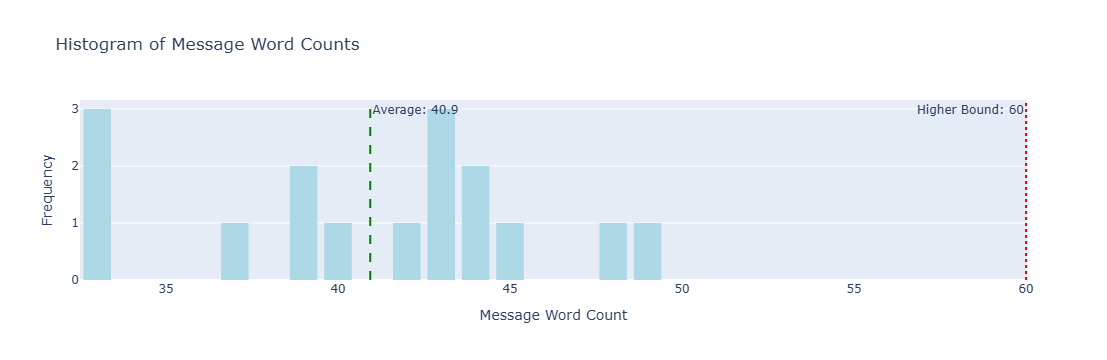

In [4]:
# Compute lengths
import plotly.graph_objects as go

# Calculate word counts
message_word_lengths = [len(msg.split()) for msg in messages]
average_word_length = sum(message_word_lengths) / len(message_word_lengths)
higher_bound = 60

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=message_word_lengths,
    nbinsx=20,
    marker_color='lightblue',
    name='Message Word Counts'
))

fig.add_vline(x=average_word_length, line_width=2, line_dash="dash", line_color="green",
              annotation_text=f"Average: {average_word_length:.1f}", annotation_position="top right")

fig.add_vline(x=higher_bound, line_width=2, line_dash="dot", line_color="red",
              annotation_text="Higher Bound: 60", annotation_position="top left")

fig.update_layout(
    title="Histogram of Message Word Counts",
    xaxis_title="Message Word Count",
    yaxis_title="Frequency",
    bargap=0.2
)

fig.show()